In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import sys
import pylab
sys.path.insert(0, '../cell_soap/')
from Lloyd_relaxation_class import Atlas

P = np.random.random((6000,2))



In [2]:
gg = Atlas(points = P, dimensions = (6000,2))

In [3]:
vor = gg.generate_voronoi()

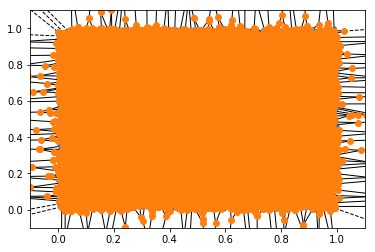

In [4]:
fig = voronoi_plot_2d(vor)

In [5]:
vor2 = gg.relax_points(times = 170)

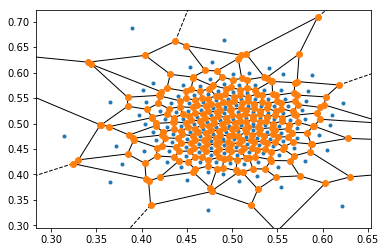

In [6]:
fig = voronoi_plot_2d(vor2)

In [7]:
vor = vor2

In [8]:
len(vor.vertices)

282

In [9]:
# fig, ax  = plt.subplots(1,1,figsize = (8,5))
# counts = [6, 1, 0, 3]
import pandas as pd

vertices_data = {'label': [], 'x': [], 'y': []}
count = 0
for j, a in enumerate(vor.vertices):
#     if a[0] > 0.1 and a[0] < 0.9 and a[1] < 0.9 and a[1] > 0.1:
    
    if count != 0:
        print(count , a[0]*1000, a[1]*1000 )
        vertices_data['label'].append(count )
        vertices_data['x'].append(a[0])
        vertices_data['y'].append(a[1])
    count += 1
#     if j in counts:
#         ax.plot(a[0], a[1], 'ok')
#     else:
#         ax.plot(a[0], a[1], '.')
# voronoi_plot_2d(vor)  
# plt.show()
vertices_dataframe = pd.DataFrame(vertices_data)
vertices_dataframe.set_index(['label'], inplace = True)

1 341.10642090150077 620.3815333020709
2 910.6100127206205 436.57527432914446
3 549.4128344030416 288.35382800798766
4 630.6586973183108 395.3414441306267
5 602.7700567938574 382.6497432899266
6 344.5083300259343 616.1015069687421
7 384.3825988208424 551.6167743417328
8 421.4764681271756 562.3588724747752
9 419.61620660978457 555.3612219003112
10 594.4840961733967 709.0175724028727
11 574.0265979678722 636.5822384470326
12 601.5634436894209 536.6969747723582
13 354.2693105612256 497.40926612569035
14 391.4577703441596 468.0637354038325
15 520.9467030536896 340.37407801483323
16 409.9243014522072 339.8347730337372
17 477.51275693427226 366.6918968398942
18 403.99441598630597 633.7718826847482
19 437.19362995184366 661.4318075807043
20 449.19880301763544 652.9928502641291
21 509.9778864289206 634.0609911763161
22 515.5308196499491 636.4549210431582
23 567.8766383242254 436.1893505493377
24 586.140209541663 444.85108464235896
25 792.4512632787952 459.43183872317394
26 670.7885591937961 49

In [10]:
edges_data = {'label': [], 'v1': [], 'v2': []}
count = 1
ridge_vertices = []
for a in vor.ridge_vertices:
    if a[0] > 0 and a[1] > 0:
        print(count ,a[0] , a[1])
        edges_data['label'].append(count)
        edges_data['v1'].append(a[0] )
        edges_data['v2'].append(a[1])
        ridge_vertices.append(np.array([a[0], a[1]]))
        count += 1
edges_dataframe = pd.DataFrame(edges_data)
edges_dataframe.set_index(['label'], inplace = True)

1 2 4
2 3 5
3 4 5
4 6 8
5 6 7
6 7 9
7 8 9
8 3 15
9 15 17
10 16 17
11 1 18
12 18 19
13 10 22
14 19 20
15 20 21
16 21 22
17 1 6
18 7 31
19 13 29
20 29 31
21 8 38
22 18 39
23 38 39
24 10 11
25 11 43
26 22 44
27 43 44
28 2 25
29 4 24
30 24 45
31 25 46
32 45 46
33 25 26
34 26 27
35 27 48
36 46 48
37 27 50
38 28 49
39 28 47
40 47 48
41 49 50
42 12 51
43 12 26
44 50 51
45 9 33
46 31 52
47 33 53
48 52 53
49 5 59
50 23 24
51 23 61
52 59 61
53 15 34
54 34 60
55 59 60
56 62 63
57 62 64
58 63 65
59 64 66
60 65 66
61 16 37
62 37 63
63 13 66
64 14 56
65 14 64
66 29 30
67 30 55
68 55 56
69 17 36
70 35 36
71 35 67
72 37 68
73 67 68
74 33 58
75 38 69
76 58 71
77 69 71
78 21 74
79 41 44
80 41 72
81 72 74
82 11 76
83 76 78
84 40 77
85 40 42
86 42 43
87 76 77
88 12 79
89 78 79
90 40 81
91 42 84
92 81 82
93 82 83
94 83 84
95 41 85
96 84 85
97 45 87
98 47 86
99 86 87
100 52 94
101 53 54
102 54 90
103 90 94
104 30 93
105 93 94
106 54 99
107 58 100
108 99 100
109 90 91
110 91 102
111 99 102
112 57 101
113 57 

In [11]:
all_edges_list = []
for i in vor.regions:
    if all([a > 0for a in i ]) and len(i) != 0:
#         print(i)

        edge_list = []
        print(i)
        for ff in range(len(i)):
            
#             print(count)
            try:
                p1 = i[ff]
                p2 = i[ff + 1]
                print(p1 + 1, p2 + 1)
                count = 0
                for jj, j in enumerate(ridge_vertices):
                    count += 1
    #                 print(j)
                    if j[0] == p1 and j[1] == p2:
                        print('yes')
                        print('j',j, jj + 1, count)
                        if len(edge_list) == 0:
                            edge_list.append(count)
                        else:
                            edge_list.append(count)

                    elif j[1] == p1 and j[0] == p2:
                        print('yes')
                        print('j', j, jj + 1, count)
                        if len(edge_list) == 0:
                            edge_list.append(-count)
                        else:
                            edge_list.append(-count)

            except:
                p1 = i[ff]
                p2 = i[0]
                print(p1 + 1, p2 + 1)
                count = 0
                for jj, j in enumerate(ridge_vertices):
                    count += 1
    #                 print(j)
                    if j[0] == p1 and j[1] == p2:
                        print('yes')
                        print('j',j, jj + 1, count)
                        if len(edge_list) == 0:
                            edge_list.append(count)
                        else:
                            edge_list.append(count)

                    elif j[1] == p1 and j[0] == p2:
                        print('yes')
                        print('j', j, jj + 1, count)
                        if len(edge_list) == 0:
                            edge_list.append(-count)
                        else:
                            edge_list.append(-count)
                
            print(edge_list)
            
        

        all_edges_list.append(edge_list)
                    
    

[9, 7, 6, 8]
10 8
yes
j [7 9] 6 6
[-6]
8 7
yes
j [6 7] 5 5
[-6, -5]
7 9
yes
j [6 8] 4 4
[-6, -5, 4]
9 10
yes
j [8 9] 7 7
[-6, -5, 4, 7]
[39, 18, 1, 6, 8, 38]
40 19
yes
j [18 39] 22 22
[-22]
19 2
yes
j [ 1 18] 11 11
[-22, -11]
2 7
yes
j [1 6] 17 17
[-22, -11, 17]
7 9
yes
j [6 8] 4 4
[-22, -11, 17, 4]
9 39
yes
j [ 8 38] 21 21
[-22, -11, 17, 4, 21]
39 40
yes
j [38 39] 23 23
[-22, -11, 17, 4, 21, 23]
[44, 22, 10, 11, 43]
45 23
yes
j [22 44] 26 26
[-26]
23 11
yes
j [10 22] 13 13
[-26, -13]
11 12
yes
j [10 11] 24 24
[-26, -13, 24]
12 44
yes
j [11 43] 25 25
[-26, -13, 24, 25]
44 45
yes
j [43 44] 27 27
[-26, -13, 24, 25, 27]
[46, 25, 2, 4, 24, 45]
47 26
yes
j [25 46] 31 31
[-31]
26 3
yes
j [ 2 25] 28 28
[-31, -28]
3 5
yes
j [2 4] 1 1
[-31, -28, 1]
5 25
yes
j [ 4 24] 29 29
[-31, -28, 1, 29]
25 46
yes
j [24 45] 30 30
[-31, -28, 1, 29, 30]
46 47
yes
j [45 46] 32 32
[-31, -28, 1, 29, 30, 32]
[48, 27, 26, 25, 46]
49 28
yes
j [27 48] 35 35
[-35]
28 27
yes
j [26 27] 34 34
[-35, -34]
27 26
yes
j [25 2

j [146 150] 176 176
[-191, 183, 176]
151 98
yes
j [ 97 150] 190 190
[-191, 183, 176, -190]
98 99
yes
j [97 98] 192 192
[-191, 183, 176, -190, 192]
99 152
yes
j [ 98 151] 193 193
[-191, 183, 176, -190, 192, 193]
152 154
yes
j [151 153] 194 194
[-191, 183, 176, -190, 192, 193, 194]
[157, 153, 151, 152, 154]
158 154
yes
j [153 157] 197 197
[-197]
154 152
yes
j [151 153] 194 194
[-197, -194]
152 153
yes
j [151 152] 195 195
[-197, -194, 195]
153 155
yes
j [152 154] 196 196
[-197, -194, 195, 196]
155 158
yes
j [154 157] 198 198
[-197, -194, 195, 196, 198]
[156, 14, 64, 62, 155]
157 15
yes
j [ 14 156] 199 199
[-199]
15 65
yes
j [14 64] 65 65
[-199, 65]
65 63
yes
j [62 64] 57 57
[-199, 65, -57]
63 156
yes
j [ 62 155] 200 200
[-199, 65, -57, 200]
156 157
yes
j [155 156] 201 201
[-199, 65, -57, 200, 201]
[157, 153, 95, 56, 14, 156]
158 154
yes
j [153 157] 197 197
[-197]
154 96
yes
j [ 95 153] 191 191
[-197, -191]
96 57
yes
j [56 95] 182 182
[-197, -191, -182]
57 15
yes
j [14 56] 64 64
[-197, -19

yes
j [233 237] 315 315
[-315]
234 235
yes
j [233 234] 316 316
[-315, 316]
235 236
yes
j [234 235] 317 317
[-315, 316, 317]
236 233
yes
j [232 235] 313 313
[-315, 316, 317, -313]
233 237
yes
j [232 236] 314 314
[-315, 316, 317, -313, 314]
237 238
yes
j [236 237] 318 318
[-315, 316, 317, -313, 314, 318]
[236, 32, 96, 211, 210, 232]
237 33
yes
j [ 32 236] 319 319
[-319]
33 97
yes
j [32 96] 188 188
[-319, 188]
97 212
yes
j [ 96 211] 281 281
[-319, 188, 281]
212 211
yes
j [210 211] 273 273
[-319, 188, 281, -273]
211 233
yes
j [210 232] 320 320
[-319, 188, 281, -273, 320]
233 237
yes
j [232 236] 314 314
[-319, 188, 281, -273, 320, 314]
[237, 102, 99, 100, 101, 233]
238 103
yes
j [102 237] 322 322
[-322]
103 100
yes
j [ 99 102] 111 111
[-322, -111]
100 101
yes
j [ 99 100] 108 108
[-322, -111, 108]
101 102
yes
j [100 101] 115 115
[-322, -111, 108, 115]
102 234
yes
j [101 233] 321 321
[-322, -111, 108, 115, 321]
234 238
yes
j [233 237] 315 315
[-322, -111, 108, 115, 321, 315]
[234, 229, 227, 5

yes
j [279 280] 409 409
[-417, -373, 403, -393, 416, 409]
[281, 263, 205, 206, 204, 280]
282 264
yes
j [263 281] 412 412
[-412]
264 206
yes
j [205 263] 381 381
[-412, -381]
206 207
yes
j [205 206] 377 377
[-412, -381, 377]
207 205
yes
j [204 206] 374 374
[-412, -381, 377, -374]
205 281
yes
j [204 280] 417 417
[-412, -381, 377, -374, 417]
281 282
yes
j [280 281] 410 410
[-412, -381, 377, -374, 417, 410]


In [12]:
all_edges_list

[[-6, -5, 4, 7],
 [-22, -11, 17, 4, 21, 23],
 [-26, -13, 24, 25, 27],
 [-31, -28, 1, 29, 30, 32],
 [-35, -34, -33, 31, 36],
 [-37, 35, -40, -39, 38, 41],
 [-42, 43, 34, 37, 44],
 [-47, -45, -6, 18, 46, 48],
 [-51, 50, -29, 3, 49, 52],
 [-54, -53, -8, 2, 49, 55],
 [-59, -57, 56, 58, 60],
 [-63, 19, 66, 67, 68, -64, 65, 59],
 [-72, -61, 10, 69, -70, 71, 73],
 [-76, -74, -45, -7, 21, 75, 77],
 [-78, 16, 26, -79, 80, 81],
 [-84, 85, 86, -25, 82, 87],
 [-91, -85, 90, 92, 93, 94],
 [-95, 79, -27, -86, 91, 96],
 [-97, 32, 36, -40, 98, 99],
 [-100, 48, 101, 102, 103],
 [-100, -46, -20, 66, 104, 105],
 [-107, -74, 47, 101, 106, 108],
 [-110, -109, -102, 106, 111],
 [-112, 113, 114, -76, 107, 115],
 [-117, -69, -9, 53, 116, 118],
 [-121, -120, -75, 23, 119, 122],
 [-123, -14, -12, 22, 119, 124],
 [-125, -78, -15, 123, 126],
 [-128, -127, 81, 125, 129],
 [-131, -120, 77, -114, 130, 132],
 [-135, -134, -44, -41, 133, 136],
 [-137, -88, 42, 134, 138, 139],
 [-140, -87, 83, 89, 137, 141],
 [-142, -9

In [13]:
all_area = []
all_points = []
for j, i in enumerate(all_edges_list):
    print(j + 1, end = " ")
    tot_area = 0
    points = []
    for k, ii in enumerate(i):
        if ii > 0:
            v1 = edges_dataframe.at[ii, 'v1']
            v2 = edges_dataframe.at[ii, 'v2']
            x1, y1 = vertices_dataframe.at[v1, 'x'], vertices_dataframe.at[v1, 'y']
            x2, y2 = vertices_dataframe.at[v2, 'x'], vertices_dataframe.at[v2, 'y']
            area = -(x2 - x1) /(y2 + y1)  
            print(ii , end = " ")
            if k ==0:
                points.append(v1)
                points.append(v2)
            else:
                if v1 not in points:
                    points.append(v1)
                elif v2 not in points:
                    points.append(v2)
#             print('test',ii, v1, v2)
        else:
            v2 = edges_dataframe.at[-ii, 'v1']
            v1 = edges_dataframe.at[-ii, 'v2']
            x1, y1 = vertices_dataframe.at[v1, 'x'], vertices_dataframe.at[v1, 'y']
            x2, y2 = vertices_dataframe.at[v2, 'x'], vertices_dataframe.at[v2, 'y']
            area = -(x2 - x1) /(y2 + y1) 
            
            print(ii , end = " ")
            if k ==0:
                points.append(v1)
                points.append(v2)
            else:
                if v1 not in points:
                    points.append(v1)
                elif v2 not in points:
                    points.append(v2)
#             print('test',ii, v1, v2)
            
    
        tot_area = tot_area + area
    print('')
#     print(tot_area)
    all_area.append(tot_area)
    all_points.append(points)
    
    
    

1 -6 -5 4 7 
2 -22 -11 17 4 21 23 
3 -26 -13 24 25 27 
4 -31 -28 1 29 30 32 
5 -35 -34 -33 31 36 
6 -37 35 -40 -39 38 41 
7 -42 43 34 37 44 
8 -47 -45 -6 18 46 48 
9 -51 50 -29 3 49 52 
10 -54 -53 -8 2 49 55 
11 -59 -57 56 58 60 
12 -63 19 66 67 68 -64 65 59 
13 -72 -61 10 69 -70 71 73 
14 -76 -74 -45 -7 21 75 77 
15 -78 16 26 -79 80 81 
16 -84 85 86 -25 82 87 
17 -91 -85 90 92 93 94 
18 -95 79 -27 -86 91 96 
19 -97 32 36 -40 98 99 
20 -100 48 101 102 103 
21 -100 -46 -20 66 104 105 
22 -107 -74 47 101 106 108 
23 -110 -109 -102 106 111 
24 -112 113 114 -76 107 115 
25 -117 -69 -9 53 116 118 
26 -121 -120 -75 23 119 122 
27 -123 -14 -12 22 119 124 
28 -125 -78 -15 123 126 
29 -128 -127 81 125 129 
30 -131 -120 77 -114 130 132 
31 -135 -134 -44 -41 133 136 
32 -137 -88 42 134 138 139 
33 -140 -87 83 89 137 141 
34 -142 -90 84 140 143 
35 -144 -127 -80 95 145 146 
36 -150 149 -151 -147 148 152 
37 -154 -145 -96 -94 153 149 
38 -157 -156 -155 93 153 150 
39 -160 -158 39 98 159 161 
40 -16

In [14]:
for j, i in enumerate(range(len(all_edges_list))):
    if all_area[j] > 0:
        print(i + 1, (i + 1))
    else:
        print(i + 1, (i + 1))

1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137


In [10]:
edges_dataframe

,v1,v2
label,,
1,4,5
2,1,2
3,2,5
4,8,10
5,9,10
6,6,10
7,6,7
8,13,14
9,13,15


In [11]:
vertices_dataframe

,x,y
label,,
1,0.318892,0.501124
2,0.412686,0.266122
3,0.737831,0.577154
4,0.228261,0.213025
5,0.356299,0.231990
6,0.801779,0.653942
7,2.022518,0.467486
8,0.389281,0.925651
9,0.863124,0.850421


In [42]:
import numpy as np

numbers = np.linspace(50,120, 71)
numbers = [int(i) for i in numbers]
tension = 0.1
num = tension




In [43]:
print('gogo3 := {set edge tension %.2f where id == %d; \n' % (tension, numbers[0]), end = ''  )    
for j, i in enumerate(numbers):
    if j > 0:
        print('      set edge tension %.2f where id == %d; \n' % (tension, i), end = '')
print('      gogo; \n', end = '')
print('      dump "voronoi_248_verts_tension_edges_50_70_%.1f.fe.txt"; \n'% num, end = '')
print('      }')

gogo3 := {set edge tension 0.10 where id == 50; 
      set edge tension 0.10 where id == 51; 
      set edge tension 0.10 where id == 52; 
      set edge tension 0.10 where id == 53; 
      set edge tension 0.10 where id == 54; 
      set edge tension 0.10 where id == 55; 
      set edge tension 0.10 where id == 56; 
      set edge tension 0.10 where id == 57; 
      set edge tension 0.10 where id == 58; 
      set edge tension 0.10 where id == 59; 
      set edge tension 0.10 where id == 60; 
      set edge tension 0.10 where id == 61; 
      set edge tension 0.10 where id == 62; 
      set edge tension 0.10 where id == 63; 
      set edge tension 0.10 where id == 64; 
      set edge tension 0.10 where id == 65; 
      set edge tension 0.10 where id == 66; 
      set edge tension 0.10 where id == 67; 
      set edge tension 0.10 where id == 68; 
      set edge tension 0.10 where id == 69; 
      set edge tension 0.10 where id == 70; 
      set edge tension 0.10 where id == 71; 
      